# Assignment

- Create and copy this file in folder `BME11`, name your new file's name as your group number (ex: group1.ipynb)
- Visualize data from `datasets/2019_nCoV_data.csv`

2019 Novel Coronavirus (2019-nCoV) is a virus (more specifically, a coronavirus) identified as the cause of an outbreak of respiratory illness first detected in Wuhan, China. Early on, many of the patients in the outbreak in Wuhan, China reportedly had some link to a large seafood and animal market, suggesting animal-to-person spread. However, a growing number of patients reportedly have not had exposure to animal markets, indicating person-to-person spread is occurring. At this time, it’s unclear how easily or sustainably this virus is spreading between people - CDC

This dataset has daily level information on the number of affected cases, deaths and recovery from 2019 novel coronavirus.

The data is available from 22 Jan 2020.

source: [kaggle](https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset)

## 0. Group Members

Firstname Lastname (Nickname) Student id.
Napassaorn Yawila Neay 6113165
Pattarapron Yungsiri Ize 6113087
Suparada Aroonsrimorakot 6113240 

## 1. Read coronavirus data from `2019_nCoV_data.csv`

In [4]:
from os import path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.metrics import r2_score
import seaborn as sns
color = sns.color_palette()
sns.set()

In [5]:
def dp(dataFileName):
    '''
    This function is used to get full data path (dp) from data file name.
    '''
    return path.join('datasets', dataFileName)

In [6]:
fileName = '2019_nCoV_data.csv'
df = pd.read_csv(dp(fileName), encoding='utf-8')

## 2. Show dataframe

In [7]:
df

,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020 12:00:00,Anhui,China,01/22/2020 12:00:00,1.0,0.0,0.0
1,2,01/22/2020 12:00:00,Beijing,China,01/22/2020 12:00:00,14.0,0.0,0.0
2,3,01/22/2020 12:00:00,Chongqing,China,01/22/2020 12:00:00,6.0,0.0,0.0
3,4,01/22/2020 12:00:00,Fujian,China,01/22/2020 12:00:00,1.0,0.0,0.0
4,5,01/22/2020 12:00:00,Gansu,China,01/22/2020 12:00:00,0.0,0.0,0.0
5,6,01/22/2020 12:00:00,Guangdong,China,01/22/2020 12:00:00,26.0,0.0,0.0
6,7,01/22/2020 12:00:00,Guangxi,China,01/22/2020 12:00:00,2.0,0.0,0.0
7,8,01/22/2020 12:00:00,Guizhou,China,01/22/2020 12:00:00,1.0,0.0,0.0
8,9,01/22/2020 12:00:00,Hainan,China,01/22/2020 12:00:00,4.0,0.0,0.0
9,10,01/22/2020 12:00:00,Hebei,China,01/22/2020 12:00:00,1.0,0.0,0.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 770 entries, 0 to 769
Data columns (total 8 columns):
Sno               770 non-null int64
Date              770 non-null object
Province/State    585 non-null object
Country           770 non-null object
Last Update       770 non-null object
Confirmed         770 non-null float64
Deaths            770 non-null float64
Recovered         770 non-null float64
dtypes: float64(3), int64(1), object(4)
memory usage: 48.2+ KB


## 3. Show which countries that affected by the virus and how many cases have been reported

In [9]:
countries = df['Country'].unique().tolist()
print(countries)

print("\nTotal countries affected by virus: ",len(countries))

['China', 'US', 'Japan', 'Thailand', 'South Korea', 'Mainland China', 'Hong Kong', 'Macau', 'Taiwan', 'Singapore', 'Philippines', 'Malaysia', 'Vietnam', 'Australia', 'Mexico', 'Brazil', 'France', 'Nepal', 'Canada', 'Cambodia', 'Sri Lanka', 'Ivory Coast', 'Germany', 'Finland', 'United Arab Emirates', 'India', 'Italy', 'Sweden', 'Russia', 'Spain', 'UK', 'Belgium']

Total countries affected by virus:  32


In [16]:
df['Country'].replace({'Mainland China':'China'}, inplace=True)
countries = df['Country'].unique().tolist()
print(countries)
print("\nTotal countries affected by virus: ",len(countries))

['China', 'US', 'Japan', 'Thailand', 'South Korea', 'Hong Kong', 'Macau', 'Taiwan', 'Singapore', 'Philippines', 'Malaysia', 'Vietnam', 'Australia', 'Mexico', 'Brazil', 'France', 'Nepal', 'Canada', 'Cambodia', 'Sri Lanka', 'Ivory Coast', 'Germany', 'Finland', 'United Arab Emirates', 'India', 'Italy', 'Sweden', 'Russia', 'Spain', 'UK', 'Belgium']

Total countries affected by virus:  31


## 4. Show and visualize total number of confirmed, deaths & recovered cases in each countries and sort it by amount of confirmed cases

In [19]:
df_sum_country = df.groupby(['Country']).sum().drop(['Sno'],axis=1).sort_values(by=['Conntfirmed'],ascending=False)
df_sum_country

,Confirmed,Deaths,Recovered
Country,,,
China,121935.0,2641.0,3212.0
Thailand,176.0,0.0,46.0
Japan,143.0,0.0,10.0
Singapore,137.0,0.0,0.0
Hong Kong,130.0,1.0,0.0
South Korea,100.0,0.0,0.0
Australia,92.0,0.0,12.0
Taiwan,92.0,0.0,0.0
Macau,79.0,0.0,0.0


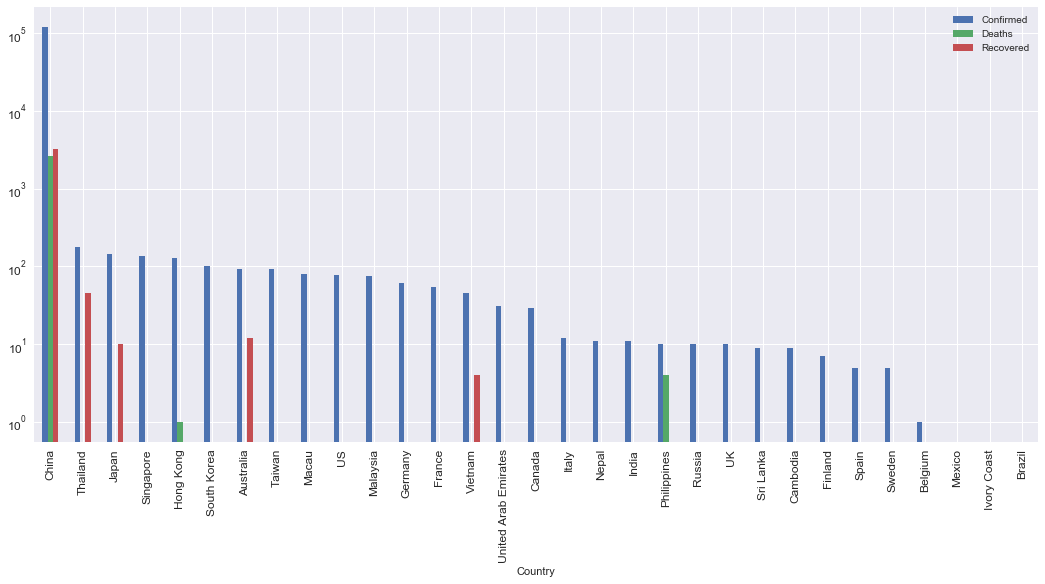

In [23]:
df_sum_country.plot(kind='bar', figsize=(18,8), fontsize=12, logy=True)

## 5. Show and visualize global spread of the coronavirus cases over time 

In [24]:
df['Date'] = df['Date'].apply(pd.to_datetime)
df.set_index('Last Update', inplace=True)
df.head()

,Sno,Date,Province/State,Country,Confirmed,Deaths,Recovered
Last Update,,,,,,,
01/22/2020 12:00:00,1,2020-01-22 12:00:00,Anhui,China,1.0,0.0,0.0
01/22/2020 12:00:00,2,2020-01-22 12:00:00,Beijing,China,14.0,0.0,0.0
01/22/2020 12:00:00,3,2020-01-22 12:00:00,Chongqing,China,6.0,0.0,0.0
01/22/2020 12:00:00,4,2020-01-22 12:00:00,Fujian,China,1.0,0.0,0.0
01/22/2020 12:00:00,5,2020-01-22 12:00:00,Gansu,China,0.0,0.0,0.0


In [27]:
df['date'] = df['Date'].dt.date
df

,Sno,Date,Province/State,Country,Confirmed,Deaths,Recovered,date
Last Update,,,,,,,,
01/22/2020 12:00:00,1,2020-01-22 12:00:00,Anhui,China,1.0,0.0,0.0,2020-01-22
01/22/2020 12:00:00,2,2020-01-22 12:00:00,Beijing,China,14.0,0.0,0.0,2020-01-22
01/22/2020 12:00:00,3,2020-01-22 12:00:00,Chongqing,China,6.0,0.0,0.0,2020-01-22
01/22/2020 12:00:00,4,2020-01-22 12:00:00,Fujian,China,1.0,0.0,0.0,2020-01-22
01/22/2020 12:00:00,5,2020-01-22 12:00:00,Gansu,China,0.0,0.0,0.0,2020-01-22
01/22/2020 12:00:00,6,2020-01-22 12:00:00,Guangdong,China,26.0,0.0,0.0,2020-01-22
01/22/2020 12:00:00,7,2020-01-22 12:00:00,Guangxi,China,2.0,0.0,0.0,2020-01-22
01/22/2020 12:00:00,8,2020-01-22 12:00:00,Guizhou,China,1.0,0.0,0.0,2020-01-22
01/22/2020 12:00:00,9,2020-01-22 12:00:00,Hainan,China,4.0,0.0,0.0,2020-01-22


In [28]:
spread_gl = df.groupby('date')["Confirmed","Deaths","Recovered"].sum()
spread_gl

,Confirmed,Deaths,Recovered
date,,,
2020-01-22,555.0,0.0,0.0
2020-01-23,653.0,18.0,30.0
2020-01-24,941.0,26.0,36.0
2020-01-25,2019.0,56.0,49.0
2020-01-26,2794.0,80.0,54.0
2020-01-27,4473.0,107.0,63.0
2020-01-28,6057.0,132.0,110.0
2020-01-29,7783.0,170.0,133.0
2020-01-30,9776.0,213.0,187.0


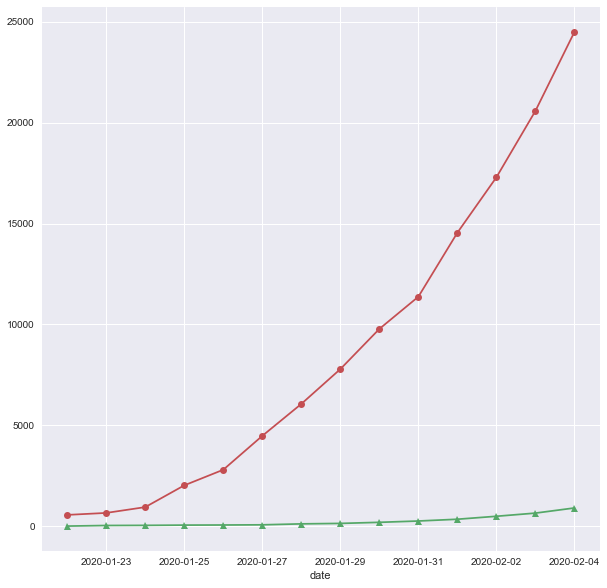

In [30]:
sns.set(color_codes=True)
plt.subplots(figsize=(10,10))
spread_gl['Confirmed'].plot(style='ro-')
spread_gl['Recovered'].plot(style='g^-')

## 6. Show relation between confirmed cases and deaths case in linear regression

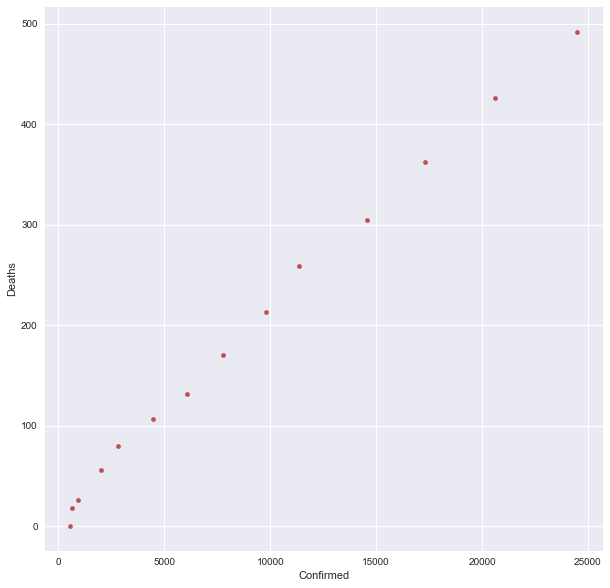

In [31]:
sns.set(color_codes=True)
spread_gl.plot(kind='scatter',x='Confirmed',y='Deaths',c='r',figsize=(10,10))

slope,intercept, r_value, p_value, std_err = stats.linregress(spread_gl['Confirmed'

In [35]:
slope,intercept, r_value, p_value, std_err = stats.linregress(spread_gl['Confirmed'],spread_gl['Deaths'])
intercept,slope

(11.284505993009049, 0.020168749319859545)

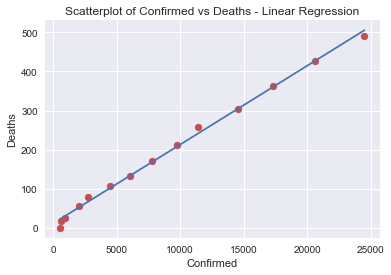

In [39]:

sns.set(color_codes=True)
def linefitline(b) :
    return intercept + slope * b
line = linefitline(spread_gl['Confirmed'])
plt.scatter(spread_gl['Confirmed'],spread_gl['Deaths'],c='r')



plt.xlabel('Confirmed')
plt.ylabel('Deaths')
plt.title('Scatterplot of Confirmed vs Deaths - Linear Regression')


plt.plot(spread_gl['Confirmed'],line, c = 'b')

plt.show()


## 7. Show dependence between confirmed cases and recovered case in linear regression

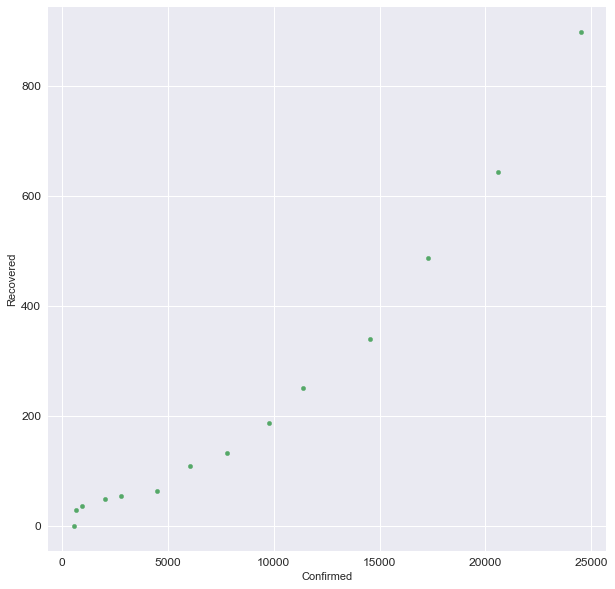

In [40]:
sns.set(color_codes=True)
spread_gl.plot(kind='scatter',figsize=(10,10),fontsize=12,style='bs-',x='Confirmed', y= 'Recovered', c='g')

In [42]:
slope,intercept, r_value, p_value, std_err = stats.linregress(spread_gl['Confirmed'],spread_gl['Recovered'])
intercept,slope

(-58.128076833055815, 0.03321816695576185)

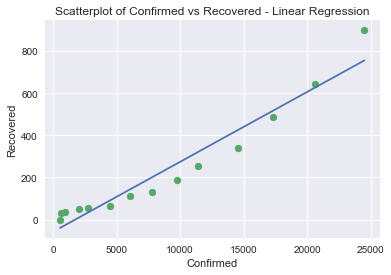

In [45]:
sns.set(color_codes=True)
def linefitline(b) :
    return intercept + slope * b
line = linefitline(spread_gl['Confirmed'])
plt.scatter(spread_gl['Confirmed'],spread_gl['Recovered'],c='g')



plt.xlabel('Confirmed')
plt.ylabel('Recovered')
plt.title('Scatterplot of Confirmed vs Recovered - Linear Regression')


plt.plot(spread_gl['Confirmed'],line, c = 'b')

plt.show()


In [46]:
r2 = r2_score(spread_gl['Recovered'],line)
print('The rsquared value is: ' + str(r2))


The rsquared value is: 0.9384390923209045


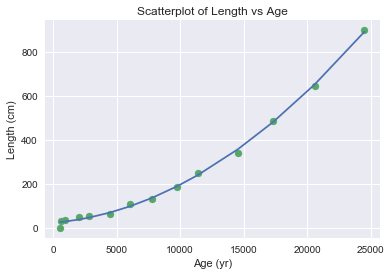

In [48]:
x = spread_gl['Confirmed']
y = spread_gl['Recovered']
plt.xlabel('Age (yr)')
plt.ylabel('Length (cm)')
plt.title('Scatterplot of Length vs Age')
a, aa,c= np.polyfit(x,y,2)

def polynomial(b):
    return (b*b*a) + (b*aa) + c
pline = polynomial(x)
plt.scatter(x,y,c ='g')
plt.plot(x,pline,c = 'b')
plt.show()


In [49]:
r2 = r2_score(pline,y)
print('The rsquared value is: ' + str(r2))

The rsquared value is: 0.9981281657169362
